In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import eccodes
import pygrib
import os
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [65]:
os.chdir('/Users/caramelo/Documents/0000_Unu_Engineering/Grib Sandrine/2019010800-06-12-18_000-048_hrdps/')
grib_list_total=sorted(glob.glob('*00_*.grib2'))
grib_list=grib_list_total[0:7]
#grib_list=grib_list_total
grib_list

['2019010800_001.grib2',
 '2019010800_002.grib2',
 '2019010800_003.grib2',
 '2019010800_004.grib2',
 '2019010800_005.grib2',
 '2019010800_006.grib2',
 '2019010800_007.grib2']

In [3]:
filename=grib_list[1]

In [4]:
filename

'2019010800_002.grib2'

In [5]:
#f = open(filename, 'rb')
grbs=pygrib.open(filename)

Afficher tous les messages grib dans chaque fichier

In [23]:
for grb in grbs:
    print(grb)
    print(grb.validDate)
    print(grb.name)
    print(grb.units)

1:236:236 (instant):polar_stereographic:surface:level 0:fcst time 2 mins:from 201901080000
2019-01-08 02:00:00
unknown
unknown
2:Wind speed (gust):m s**-1 (instant):polar_stereographic:surface:level 0:fcst time 2 mins:from 201901080000
2019-01-08 02:00:00
Wind speed (gust)
m s**-1
3:33:33 (instant):polar_stereographic:heightAboveGround:level 2 m:fcst time 2 mins:from 201901080000
2019-01-08 02:00:00
unknown
unknown
4:2 metre dewpoint temperature:K (instant):polar_stereographic:heightAboveGround:level 2 m:fcst time 2 mins:from 201901080000
2019-01-08 02:00:00
2 metre dewpoint temperature
K
5:2 metre temperature:K (instant):polar_stereographic:heightAboveGround:level 2 m:fcst time 2 mins:from 201901080000
2019-01-08 02:00:00
2 metre temperature
K
6:10 metre wind direction:Degree true (instant):polar_stereographic:heightAboveGround:level 10 m:fcst time 2 mins:from 201901080000
2019-01-08 02:00:00
10 metre wind direction
Degree true
7:197:197 (instant):polar_stereographic:surface:level 0:f

In [22]:
grbs.seek(0)#continuous flow of information

In [8]:
grb=grbs[1]

In [9]:
grb

1:236:236 (instant):polar_stereographic:surface:level 0:fcst time 2 mins:from 201901080000

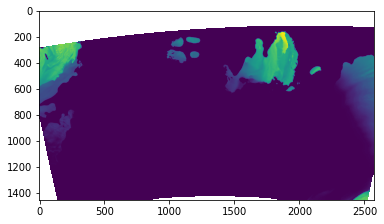

In [10]:
plt.imshow(grb.values)

In [11]:
lats,lons=grb.latlons()

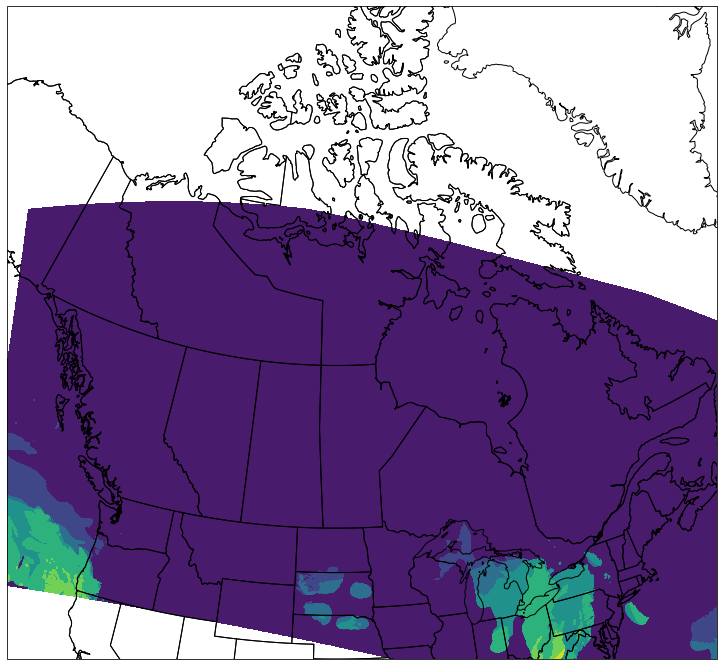

In [15]:
map_crs=ccrs.LambertConformal(central_longitude=-100,
                              central_latitude=53,
                             standard_parallels=(30,60))

data_crs=ccrs.PlateCarree()

fig=plt.figure(1,figsize=(14,12))
ax=plt.subplot(1,1,1,projection=map_crs)
ax.set_extent([-130,-65,40,80],data_crs)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

ax.contourf(lons,lats,grb.values,transform=data_crs)

Maintenant, comment on exploite ceci avec l'ajout du temps? Je pense encore que la meilleure stratégie réside dans rioxarray.

In [63]:
xds=xr.open_dataset(grib_list[1],engine='cfgrib',backend_kwargs={'filter_by_keys':{'typeOfLevel':'surface'}})
xds.rio.write_crs(xds_rasterio.crs) 


Ignoring index file '/Users/caramelo/Documents/0000_Unu_Engineering/Grib Sandrine/2019010800-06-12-18_000-048_hrdps/2019010800_002.grib2.90c91.idx' incompatible with GRIB file


ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [31]:
import rioxarray
import rasterio

In [64]:
xds_lonlat=xds.rio.reproject('EPSG:4326')

MissingCRS: CRS not found. Please set the CRS with 'rio.write_crs()'. Data variable: paramId_0

In [33]:
xds.attrs

{'GRIB_edition': 2,
 'GRIB_centre': 'cwao',
 'GRIB_centreDescription': 'Canadian Meteorological Service - Montreal ',
 'GRIB_subCentre': 0,
 'Conventions': 'CF-1.7',
 'institution': 'Canadian Meteorological Service - Montreal ',
 'history': '2021-03-09T12:00:45 GRIB to CDM+CF via cfgrib-0.9.8.5/ecCodes-2.20.0 with {"source": "/Users/caramelo/Documents/0000_Unu_Engineering/Grib Sandrine/2019010800-06-12-18_000-048_hrdps/2019010800_002.grib2", "filter_by_keys": {"typeOfLevel": "surface"}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}

<xarray.Dataset>
Dimensions:      (x: 2576, y: 1456)
Coordinates:
    time         datetime64[ns] 2019-01-08
    step         timedelta64[ns] 02:00:00
    surface      int64 0
    latitude     (y, x) float64 ...
    longitude    (y, x) float64 ...
    valid_time   datetime64[ns] 2019-01-08T02:00:00
    spatial_ref  int64 0
Dimensions without coordinates: x, y
Data variables:
    paramId_0    (y, x) float32 ...
    gust         (y, x) float32 ...
    pop          (y, x) float32 ...
    tstm         (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal 
    history:                 2021-03-09T12:00:45 GRIB to CDM+CF via cfgrib-0....
    grid_mapping:            spatial_ref

In [48]:
xds.rio.reproject('EPSG:4326')

MissingCRS: CRS not found. Please set the CRS with 'rio.write_crs()'. Data variable: paramId_0

In [53]:
xds.rio.crs

CRS.from_epsg(4326)

In [58]:
xds_rasterio=xr.open_rasterio(grib_list[1])
xds_rasterio


<xarray.DataArray (band: 19, y: 1456, x: 2576)>
[71262464 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * y        (y) float64 -2.101e+06 -2.103e+06 ... -5.736e+06 -5.738e+06
  * x        (x) float64 -2.098e+06 -2.095e+06 -2.093e+06 ... 4.337e+06 4.34e+06
Attributes:
    transform:     (2500.0, 0.0, -2099127.494496938, 0.0, -2500.0, -2099388.5...
    crs:           +proj=stere +lat_0=90 +lat_ts=60 +lon_0=252 +x_0=0 +y_0=0 ...
    res:           (2500.0, 2500.0)
    is_tiled:      0
    nodatavals:    (9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9...
    scales:        (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....
    offsets:       (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
    descriptions:  ('0[-] SFC="Ground or water surface"', '0[-] SFC="Ground o...

In [61]:
xds_rasterio.crs

'+proj=stere +lat_0=90 +lat_ts=60 +lon_0=252 +x_0=0 +y_0=0 +R=6371229 +units=m +no_defs=True'

(array([5.9218233e+07, 8.7575560e+06, 0.0000000e+00, 3.0980000e+03,
        0.0000000e+00, 0.0000000e+00, 2.9160000e+03, 1.0000000e+01,
        0.0000000e+00, 3.2806510e+06]),
 array([ -999. ,  8998.6, 18996.2, 28993.8, 38991.4, 48989. , 58986.6,
        68984.2, 78981.8, 88979.4, 98977. ]),
 <BarContainer object of 10 artists>)

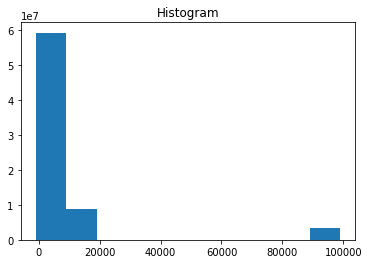

In [60]:
xds.plot()

In [ ]:
#new data array
### Making the new data set with coordinates from tiff_file and data from dataarray
ds_new = xr.DataArray(ds.classification, coords={"y": xarr.y, "x": xarr.x}, dims=['y', 'x'])
ds_new.attrs = ds.attrs

# Adding CRS information
ds_new['crs'] = 0
ds_new['crs'].attrs = xarr.rio.crs


## closing used datasets
xarr.close()
ds.close()

## Reprojecting
ds_reproj = ds.rio.reproject(proj_stereo)


In [66]:
#Essai de traiter seulement

os.chdir('/Users/caramelo/Documents/0000_Unu_Engineering/Grib Sandrine/2019010800-06-12-18_000-048_hrdps/')
grib_list_total=sorted(glob.glob('*00_*.grib2'))
grib_list=grib_list_total[0:7]
#grib_list=grib_list_total
grib_list



['2019010800_001.grib2',
 '2019010800_002.grib2',
 '2019010800_003.grib2',
 '2019010800_004.grib2',
 '2019010800_005.grib2',
 '2019010800_006.grib2',
 '2019010800_007.grib2']

In [67]:
ds_surface=xr.open_mfdataset(grib_list,concat_dim='valid_time',engine='cfgrib',combine='nested',parallel=True,backend_kwargs={'filter_by_keys':{'typeOfLevel':'surface'}})

Ignoring index file '/Users/caramelo/Documents/0000_Unu_Engineering/Grib Sandrine/2019010800-06-12-18_000-048_hrdps/2019010800_002.grib2.90c91.idx' incompatible with GRIB file
Ignoring index file '/Users/caramelo/Documents/0000_Unu_Engineering/Grib Sandrine/2019010800-06-12-18_000-048_hrdps/2019010800_007.grib2.90c91.idx' incompatible with GRIB file
Ignoring index file '/Users/caramelo/Documents/0000_Unu_Engineering/Grib Sandrine/2019010800-06-12-18_000-048_hrdps/2019010800_004.grib2.90c91.idx' incompatible with GRIB file
Ignoring index file '/Users/caramelo/Documents/0000_Unu_Engineering/Grib Sandrine/2019010800-06-12-18_000-048_hrdps/2019010800_003.grib2.90c91.idx' incompatible with GRIB file
Ignoring index file '/Users/caramelo/Documents/0000_Unu_Engineering/Grib Sandrine/2019010800-06-12-18_000-048_hrdps/2019010800_005.grib2.90c91.idx' incompatible with GRIB file
Ignoring index file '/Users/caramelo/Documents/0000_Unu_Engineering/Grib Sandrine/2019010800-06-12-18_000-048_hrdps/2019

In [70]:
ds_surface.rio.write_crs(xds_rasterio.crs) 
coords_stations=pd.read_csv('Stations matrice scribe.csv')
#coords_stations


NameError: name 'pd' is not defined

{'GRIB_edition': 2,
 'GRIB_centre': 'cwao',
 'GRIB_centreDescription': 'Canadian Meteorological Service - Montreal ',
 'GRIB_subCentre': 0,
 'Conventions': 'CF-1.7',
 'institution': 'Canadian Meteorological Service - Montreal ',
 'history': '2021-03-09T12:52:54 GRIB to CDM+CF via cfgrib-0.9.8.5/ecCodes-2.20.0 with {"source": "/Users/caramelo/Documents/0000_Unu_Engineering/Grib Sandrine/2019010800-06-12-18_000-048_hrdps/2019010800_001.grib2", "filter_by_keys": {"typeOfLevel": "surface"}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}